In [1]:
# otter might already be installed, but if you get an error running the first cell, you can uncomment and run this one
#%pip install otter_grader

# Practice 1: Decision trees and machine learning fundamentals

The first section of this practice notebook walks through the steps we learned using a toy datasets, and the second uses a real dataset. This way you get to practice what you have learned twice. Don't worry if you can't finish the entire second part with the real data set, most questions give automated feedback so you should be able to continue on your own time after the workshop. This notebook is adapted to this workshop from our teaching material, so some questions have been removed and you might noticed that the question numbers are not always sequential. Have fun and let us know if you have any questions!

<br><br>

## Imports

Run this cells to initialize a couple of libraries we use for the automated feedback.

In [2]:
# Run this cell to start
from hashlib import sha1
import numpy as np

## Exercise 1: Decision trees with a toy dataset 
<hr>

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, whether there is work-hour flexibility, and whether the company is a start-up or not. So the `X` of your offer data looks as follows: 

In [3]:
import pandas as pd


offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0, 1],
    "work_hour_flexibility": [0, 0, 1, 1],
    "start_up": [0, 1, 1, 1],    
}

offer_df = pd.DataFrame(offer_data)
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


Your goal is to get predictions for these rows. In other words, for each row, you want to predict whether that job would make you **happy** or **unhappy**.   

So you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy in your job? (happy or unhappy)

Suppose you get the following data from this toy survey. You decide to train a machine learning model using this toy survey data and use this model to predict which job from `offer_df` is likely to make you happy. 

In [4]:
happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


<br><br>

### 1.1 Decision stump by hand 
rubric={autograde:2}

**Your tasks:**

With this toy dataset, build a decision stump (decision tree with only 1 split) by hand, splitting on the condition `supportive_colleagues <= 0.5`. What training accuracy would you get with this decision stump? Save the accuracy as a decimal in an object named `supportive_colleagues_acc`. 

> You do not have to show any calculations or code. 

<div class="alert alert-warning">

Solution_1.1
    
</div>

In [5]:
supportive_colleagues_acc = None

# BEGIN SOLUTION

supportive_colleagues_acc = 0.9

# END SOLUTION

In [6]:
assert not supportive_colleagues_acc is None, "Are you setting the provided variable?"
assert (
    sha1(str(supportive_colleagues_acc).encode("utf8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "Your answer is incorrect, see traceback above."

<br><br>

### 1.2 Separating features and target
rubric={autograde:2}

Recall that in `scikit-learn`, before building a classifier, we need to separate features and target. 

**Your tasks:**

1. Separate features and target from `train_df` and save them in `X_train_toy` and `y_train_toy`, respectively. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

In [7]:
X_train_toy = None
y_train_toy = None

# BEGIN SOLUTION

X_train_toy = train_df.drop(columns=["target"])
y_train_toy = train_df["target"]

# END SOLUTION

In [8]:
assert not X_train_toy is None, "Are you using the correct variable?"
assert not y_train_toy is None, "Are you using the correct variable?"
assert X_train_toy.shape == (10, 3), "X_train_toy shape is incorrect"
assert y_train_toy.shape == (10,), "y_train_toy shape is incorrect"

<br><br>

### 1.3 Create a decision tree classifier object
rubric={autograde:1}

**Your tasks:**

1. Create a `DecisionTreeClassifier` object with `random_state=16` and store it in a variable called `toy_tree`.

<div class="alert alert-warning">

Solution_1.3
    
</div>

In [9]:
# Import the decision tree classifier
...

toy_tree = None

# BEGIN SOLUTION

from sklearn.tree import DecisionTreeClassifier
# instantiate a class of the DecisionTreeClassifier
toy_tree = DecisionTreeClassifier(random_state=16)

# END SOLUTION

In [10]:
assert isinstance(toy_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
assert (toy_tree.get_params().get("random_state") == 16), "Please set the random state to 16"

<br><br>

### 1.4 `fit` the decision tree classifier 
rubric={autograde:1}

**Your tasks:**

1. Now train a decision tree model by calling `fit` on `toy_tree` with `X_train_toy` and `y_train_toy` created above. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

In [11]:
# BEGIN SOLUTION

# fit the model to the data.
toy_tree.fit(X_train_toy, y_train_toy)

# END SOLUTION

DecisionTreeClassifier(random_state=16)

In [12]:
assert toy_tree.get_depth() in range(2, 4, 1), "DecisionTreeClassifier was not fitted properly"
assert toy_tree.get_n_leaves() in range(3, 5, 1), "DecisionTreeClassifier was not fitted properly"

<br><br>

### 1.5 Visualize the trained decision tree
rubric={autograde:2}

**Your tasks:**

1. Visualize the trained decision tree model using the same function we used in the lecture notes (we have copied it here for you). Save the visualization tree returned by the function below in a variable called `toy_tree_viz`.  

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


def display_tree(model, filled=True, impurity=False, ax=None, figsize=(12, 8), **kwargs):
    if ax is None:
        ax = plt.subplots(figsize=figsize)[1]
    return plot_tree(
        model,
        feature_names=model.feature_names_in_,
        class_names=model.classes_.astype(str) if hasattr(model, 'classes_') else None, # To avoid errors when using regression trees
        filled=filled,
        impurity=impurity,
        ax=ax,
        **kwargs,
    )

<div class="alert alert-warning">

Solution_1.5
    
</div>

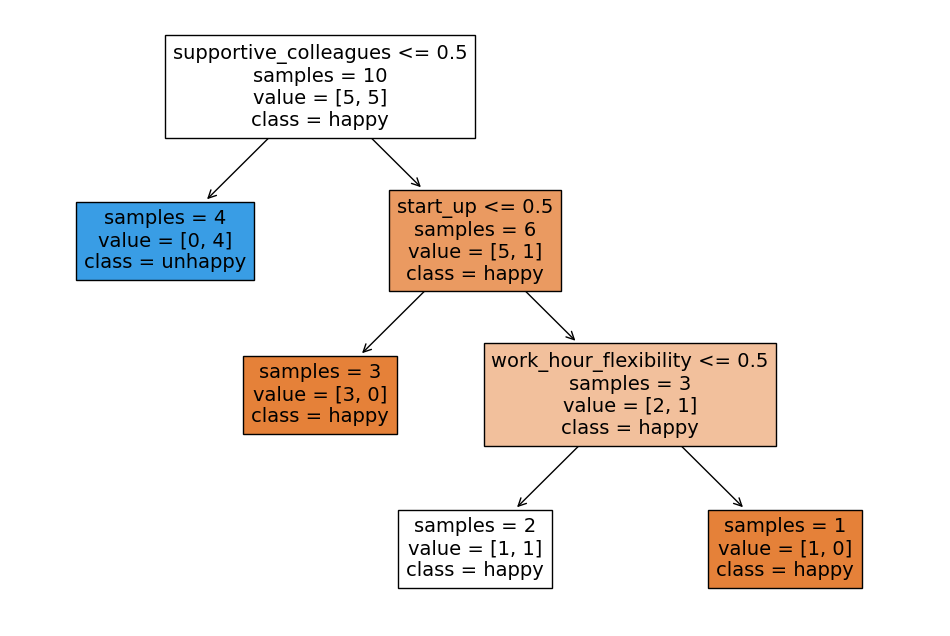

In [14]:
toy_tree_viz = None

# BEGIN SOLUTION
toy_tree_viz = display_tree(toy_tree)
# END SOLUTION

toy_tree_viz;

In [15]:
assert not toy_tree_viz is None, "Are you using the provided variable?"

<br><br>

### 1.6 Depth of the tree
rubric={autograde:1}

**Your tasks:**

1. What's the depth of the learned decision tree model? Save it as an integer in the variable `toy_depth` below. Hint: You can either input the depth manually by looking at your visualzation above or use the `.get_depth()` method of the decision tree object.

<div class="alert alert-warning">

Solution_1.6
    
</div>

In [16]:
toy_depth = None

# BEGIN SOLUTION
toy_depth = toy_tree.get_depth()
# END SOLUTION

In [17]:
assert not toy_depth is None, "Are you using the provided variable?"
assert (sha1(str(toy_depth).encode("utf-8")).hexdigest() == "77de68daecd823babbb58edb1c8e14d7106e83bb"), "The depth is incorrect"

<br><br>

### 1.7 Accuracy calculation
rubric={autograde:1}

**Your tasks:**

1. Evaluate the `toy_tree` on the training data (i.e., call `score()` on `X_train_toy` and `y_train_toy`) and store the score in a variable called `train_acc`.

<div class="alert alert-warning">

Solution_1.7
    
</div>

In [18]:
train_acc = None

# BEGIN SOLUTION
train_acc = toy_tree.score(X_train_toy, y_train_toy)
train_acc
# END SOLUTION

0.9

In [19]:
assert not train_acc is None, "Are you using the provided train_acc variable?"
assert (sha1(str(np.round(train_acc, 2)).encode("utf-8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "The score is incorrect"

<br><br>

### 1.8 Discussion
rubric={reasoning:2}

**Your tasks:**

1. Do you get perfect training accuracy? Why or why not? 

<details><summary>Solutions</summary>

We do not get perfect training accuracy. Notice that the model made an "error" on example with index 8; the original target is "unhappy" and the predicted one is "happy". This is because we have some inconsistency in the training data; we have two examples in the dataset with exactly the same feature vectors but different targets.

</details>

<div class="alert alert-warning">

Solution_1.8
    
</div>

<br><br>

### 1.9 Predicting on the offer data 
rubric={autograde:3}

Recall that our goal is to predict in which jobs you are likely to be happy. The `offer_df` dataframe below has all the job offers you have received. 

**Your tasks:**

1. Using the trained decision tree above, predict the targets for all examples in `offer_df` and store them in the `predictions` variable below. In which of the job offers is the model predicting that you will be happy?

In [20]:
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


<div class="alert alert-warning">

Solution_1.9
    
</div>

In [21]:
# BEGIN SOLUTION
predictions = toy_tree.predict(offer_df)
# END SOLUTION

predictions

array(['happy', 'unhappy', 'unhappy', 'happy'], dtype=object)

In [22]:
assert not predictions is None, "Are you storing predictions in the provided variable predictions?"
assert (predictions == toy_tree.predict(offer_df)).all(), "Your predictions do not look as expected."

<br><br><br><br>

## Exercise 2: Decision trees on Spotify Song Attributes dataset <a name="2"></a>
<hr>

### Introducing the dataset
  
For the rest of this practice session lab you'll be using [a dataset of Spotify Song Attributes](https://raw.githubusercontent.com/UBC-MDS/intro-to-ml-workshop/main/practice/p1/data/spotify.csv). The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

### 2.2 Data splitting 
rubric={autograde:2}

We have provided the code to read in the data CSV directly from the URL and to store it as a pandas dataframe named `spotify_df`.


**Your tasks:**

1. Split the dataframe into `train_df` and `test_df` with `random_state=123` and `test_size=0.2`. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

In [23]:
# To simplify the problem, we are only keeping a subset of the original columns
url = 'https://raw.githubusercontent.com/UBC-MDS/intro-to-ml-workshop/main/practice/p1/data/spotify.csv'
spotify_df = pd.read_csv(url, index_col=0)[['acousticness', 'danceability', 'liveness', 'tempo', 'energy', 'valence', 'loudness', 'target']]
spotify_df

,acousticness,danceability,liveness,tempo,energy,valence,loudness,target
0,0.01020,0.833,0.1650,150.062,0.434,0.286,-8.795,1
1,0.19900,0.743,0.1370,160.083,0.359,0.588,-10.401,1
2,0.03440,0.838,0.1590,75.044,0.412,0.173,-7.148,1
3,0.60400,0.494,0.0922,86.468,0.338,0.230,-15.236,1
4,0.18000,0.678,0.4390,174.004,0.561,0.904,-11.648,1
...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,0.1290,74.976,0.932,0.211,-3.501,0
2013,0.08770,0.894,0.0528,110.041,0.892,0.867,-2.663,0
2014,0.00857,0.637,0.2140,150.082,0.935,0.470,-2.467,0
2015,0.00164,0.557,0.0913,150.011,0.992,0.623,-2.735,0


In [24]:
# Import the train test split funciton
...

train_df, test_df = ..., ...

# BEGIN SOLUTION
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)
# END SOLUTION

In [25]:
assert (not train_df is None and not test_df is None), "Are you using the provided variables?"
n_total_samples = spotify_df.shape[0]
assert test_df.shape[0] == round(n_total_samples * 0.2) + (n_total_samples % 5 > 0), "Are you using the provided test size?"

In [26]:
assert np.isclose(train_df.iloc[30]["liveness"], 0.268), "Are you using the provided random state?"
assert np.isclose(test_df.iloc[88]["danceability"], 0.727), "Are you using the provided random state?"

<br><br>

### Exploratory data analysis (EDA)
rubric={autograde:2}

Right after splitting our data into train and test, we want to do some exploratory data analysis on the training dataframe. This analysis can help us idenitfy any data cleaning we need to do, what features could be informative for the target value, which models might be suirable for our problem, and more. The golden rule applies here to, the information we gather from the EDA will inform our down stream data science decision, so we don't want any information from the test data set to be used here.

Since we didn't cover EDA in this workshop, we will show you a couple of summary statistics and plots that can be useful. For more inspiration of what you should look at during EDA, please [see some example here](https://joelostblom.github.io/altair_ally/examples.html)

In [27]:
# Show summary statistics for each column
train_df.describe()

,acousticness,danceability,liveness,tempo,energy,valence,loudness,target
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185627,0.616745,0.189189,121.979777,0.681296,0.497587,-7.112929,0.507750
std,0.259324,0.163225,0.153170,26.965641,0.211612,0.247378,3.838867,0.500095
min,0.000005,0.122000,0.018800,47.859000,0.014800,0.035900,-33.097000,0.000000
25%,0.009190,0.511000,0.092300,100.518000,0.564000,0.295000,-8.388000,0.000000
50%,0.062500,0.629000,0.127000,121.990000,0.714000,0.496000,-6.248000,1.000000
75%,0.251000,0.738000,0.243000,137.932000,0.844000,0.690000,-4.791000,1.000000
max,0.995000,0.984000,0.969000,219.331000,0.997000,0.992000,-0.307000,1.000000


The starter code below produces distribution plots and pairwise scatter plots for all the features, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

Let's say that, for a particular feature, the distribution plots of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?. 
No, the feature might still be useful, because it may be predictive in conjunction with other features. For example, the valence feature density plots (below) do indeed look quite overlapping. But it may be the case that very high valence in conjunction with low tempo is very predictive of a liked song. This type of pattern would not emerge in these individual density plots and not in the pairwise scatter plots if the relationship is complex, but a decision tree could potentially still learn it.

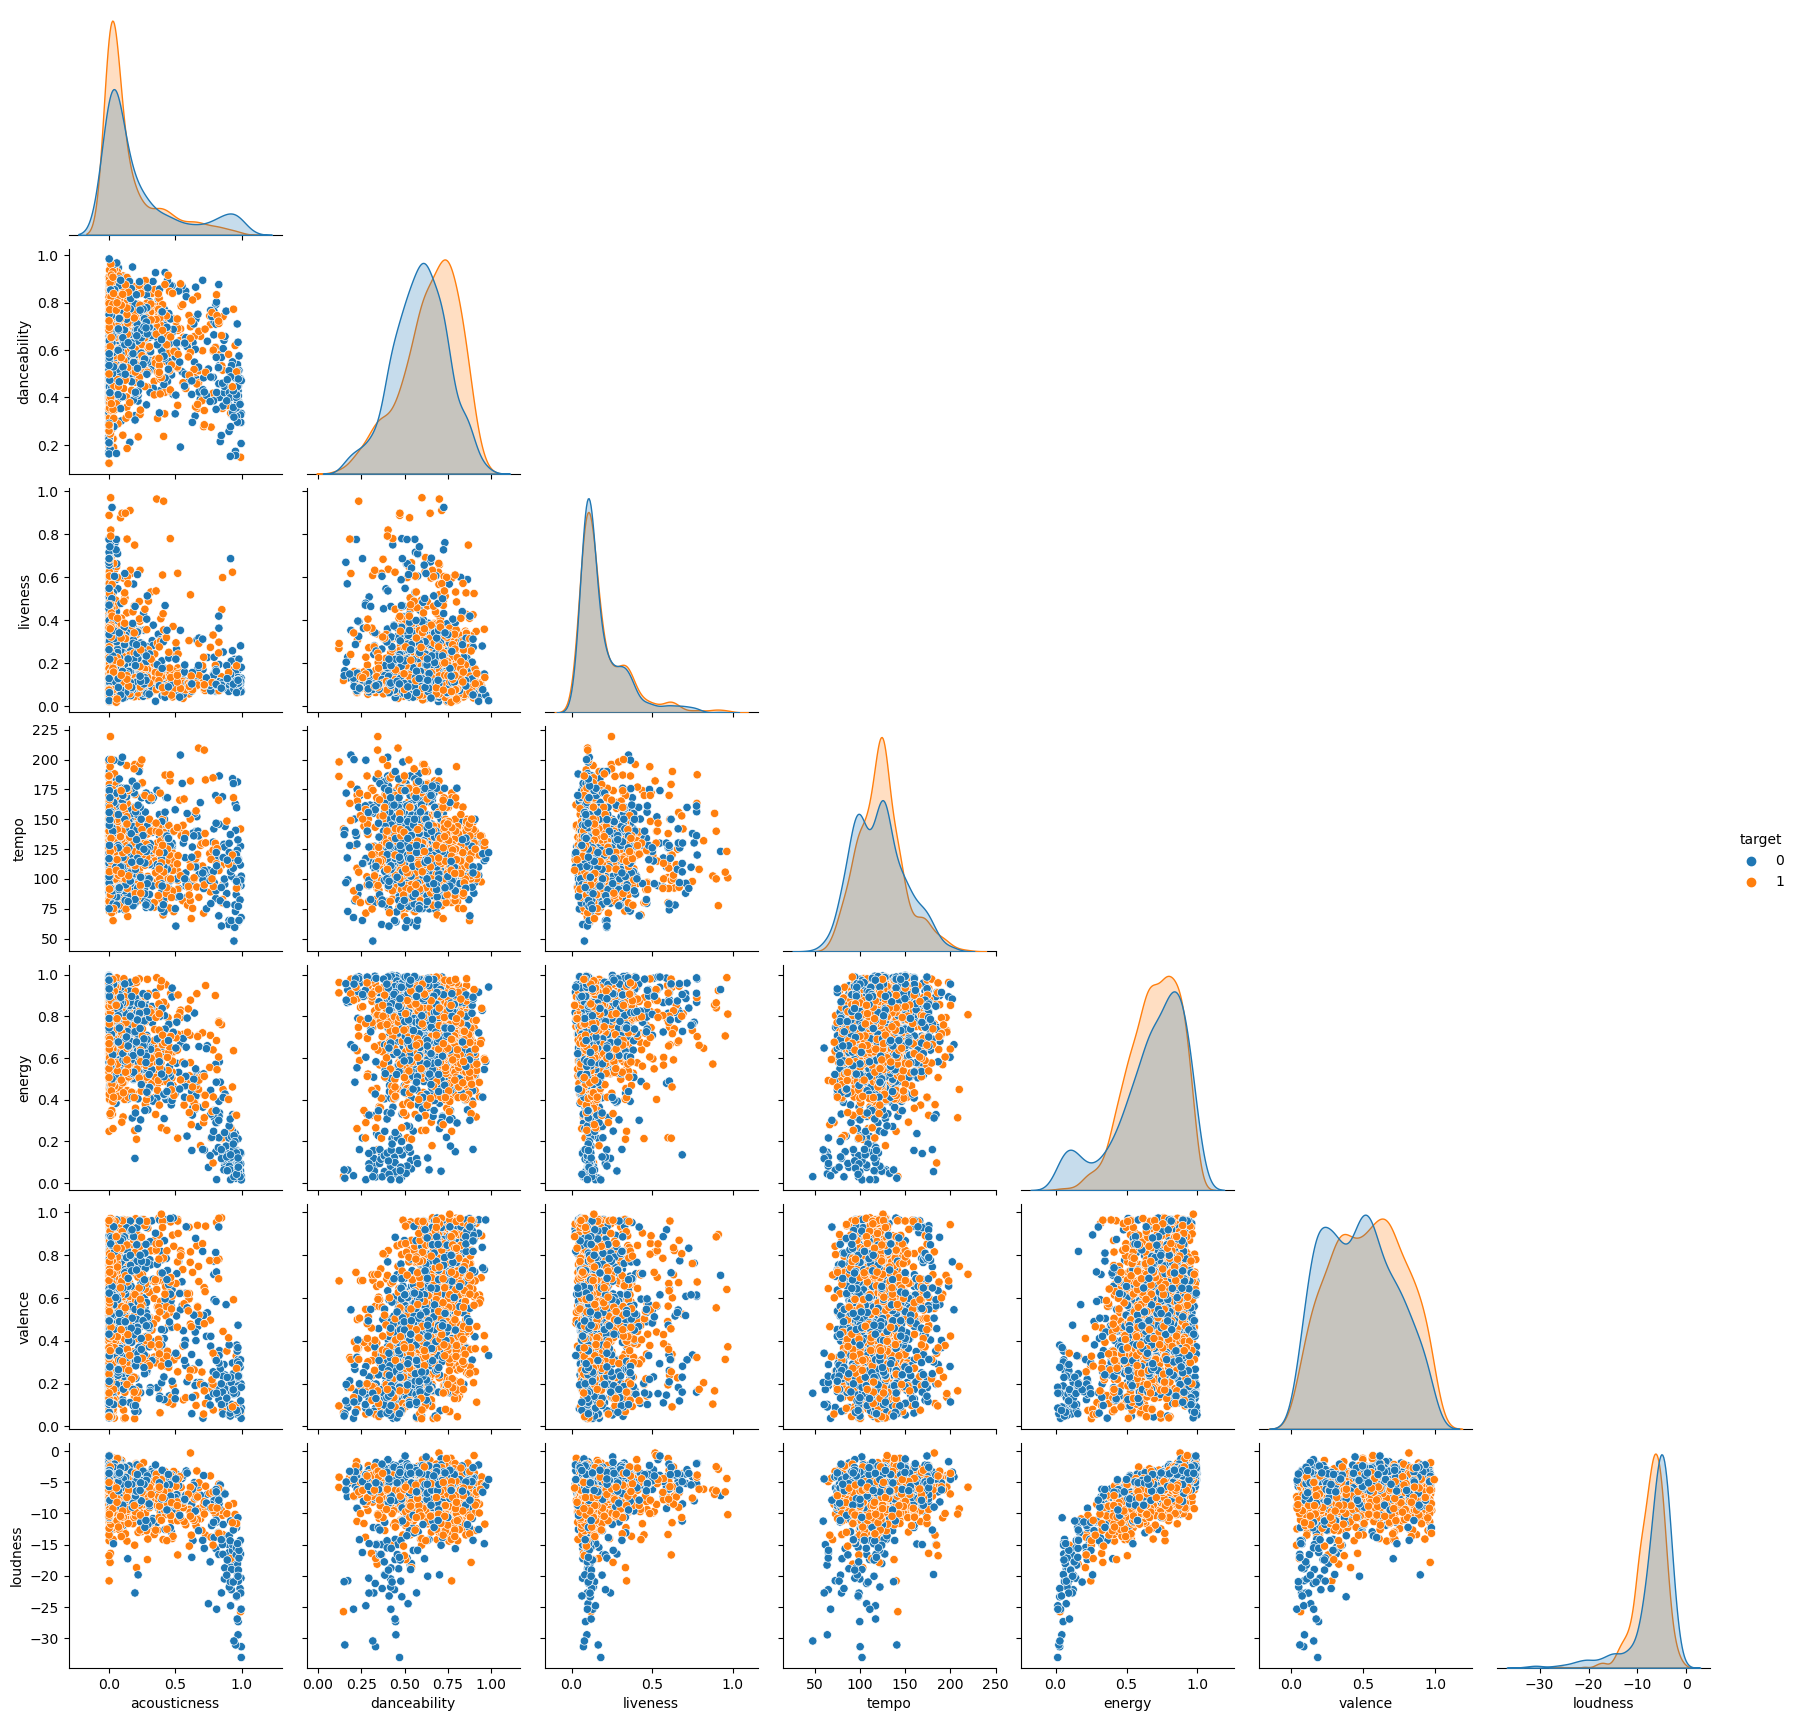

In [28]:
import seaborn as sns


sns.pairplot(train_df, hue='target', corner=True)

<br><br><br><br>

## Model building
<hr>

Now that we did some preliminary exploratory data analysis (EDA), let's move on to modeling. 

<br><br>

### 3.1 Creating `X` and `y`
rubric={autograde:2}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` from the previous exercise and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively.

<div class="alert alert-warning">

Solution_3.1
    
</div>

In [29]:
X_train = None
y_train = None
X_test = None
y_test = None

# BEGIN SOLUTION
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target"])
y_test = test_df["target"]

# END SOLUTION

In [30]:
assert isinstance(X_train, pd.DataFrame), "X_train is not created correctly"
assert isinstance(y_train, pd.Series), "y_train is not created correctly"
assert isinstance(X_test, pd.DataFrame), "X_test is not created correctly"
assert isinstance(y_test, pd.Series), "y_test is not created correctly"
assert X_train.shape == (1613, 7), "X_train has the wrong shape"
assert X_test.shape == (404, 7), "X_test has the wrong shape"

<br><br>

<br><br>

### 3.2 The baseline model: `DummyClassifier`
rubric={autograde:2}

**Your tasks:**
1. Carry out 10-fold cross-validation on `DummyClassifier` object above using `cross_validate` on `X_train` and `y_train`. Pass `return_train_score=True` to `cross_validate`. Return the train score and store the object as a dataframe in the `dummy_score` variable below

<div class="alert alert-warning">

Solution_3.2
    
</div>

In [31]:
# Import the dummy classifier class and the cross_validate function
...

dummy_score = None
# BEGIN SOLUTION
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate


dummy = DummyClassifier()
dummy_scores = pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=10, return_train_score=True))
dummy_scores
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.000495,0.000211,0.506173,0.507926
1,0.000373,0.000170,0.506173,0.507926
2,0.000339,0.000163,0.506173,0.507926
3,0.000300,0.000178,0.503106,0.508264
4,0.000297,0.000149,0.509317,0.507576
5,0.000287,0.000162,0.509317,0.507576
6,0.000378,0.000175,0.509317,0.507576
7,0.000739,0.000205,0.509317,0.507576
8,0.000320,0.000155,0.509317,0.507576
9,0.000299,0.000148,0.509317,0.507576


In [32]:
assert not dummy_scores is None, "Are you using the provided variable?"
assert(dummy_scores.shape[0] == 10)

dummy2 = DummyClassifier()
dummy_scores2 = pd.DataFrame(cross_validate(dummy2, X_train, y_train, cv=10, return_train_score=True))
assert(dummy_scores['test_score'].mean() == dummy_scores2['test_score'].mean())

<br><br>

### 3.3
rubric={autograde:2}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.

<div class="alert alert-warning">

Solution_3.3
    
</div>

In [33]:
# Make the necessary import
...

spotify_tree = None

# BEGIN SOLUTION
from sklearn.tree import DecisionTreeClassifier
spotify_tree = DecisionTreeClassifier(random_state=123)
# END SOLUTION

In [34]:
assert isinstance(spotify_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
assert (spotify_tree.get_params().get("random_state") == 123), "Please set the random state to 123"

<br><br>

### 3.4 Cross-validation with `DecisionTreeClassifier`
rubric={autograde:4}

**Your tasks:** 

1. Carry out 10-fold cross validation with the `spotify_tree` object above using `cross_validate` on `X_train` and `y_train`. Pass `return_train_score=True` to `cross_validate`. Save the results as a pandas dataframe in a variable called `dt_scores_df`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

In [35]:
dt_scores_df = None

# BEGIN SOLUTION
dt_scores_df = pd.DataFrame(
    cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
)
dt_scores_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.009286,0.001390,0.635802,0.999311
1,0.008742,0.001819,0.592593,1.000000
2,0.008817,0.001054,0.623457,0.999311
3,0.008631,0.001158,0.639752,1.000000
4,0.008800,0.001455,0.621118,0.999311
5,0.010933,0.001828,0.683230,0.999311
6,0.009286,0.001841,0.658385,0.999311
7,0.009193,0.001003,0.633540,0.999311
8,0.008526,0.000952,0.664596,0.999311
9,0.008733,0.000994,0.590062,0.999311


In [36]:
assert isinstance(dt_scores_df, pd.DataFrame), "dt_scores_df should be a DataFrame"
assert len(dt_scores_df) == 10, "Please check parameters of `cross_validate`"

In [37]:
assert dt_scores_df.shape[0] == 10, "Are you carrying out 10-fold cross-validation?"
assert dt_scores_df.shape[1] == 4, "Are you passing return_train_scores = True?"

In [38]:
assert np.isclose(round(dt_scores_df["test_score"].mean(), 3), 0.634), "Your test scores are incorrect"
assert np.isclose(round(dt_scores_df["train_score"].mean(), 3), 0.999), "Your train scores are incorrect"

<br><br>

## Hyperparameters <a name="4"></a>
<hr>

### 4.1 Train and cross-validation plots
rubric={autograde:12}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with the following values of `max_depth`: `range(1, 25, 2)`. Set the `random_state` of `DecisionTreeClassifier` to 123 in each case for reproducibility. 
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation accuracies on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which and make sure each curve and the axes have the reasonable name. Save the plot to `max_depth_plot`.


**There are some automatic checks on this question, but they don't represent the only way of going about solving this question, so you can check in with us that your chart looks reasonable if you think it is correct but the tests are failling.**

In [39]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_4.1
    
</div>

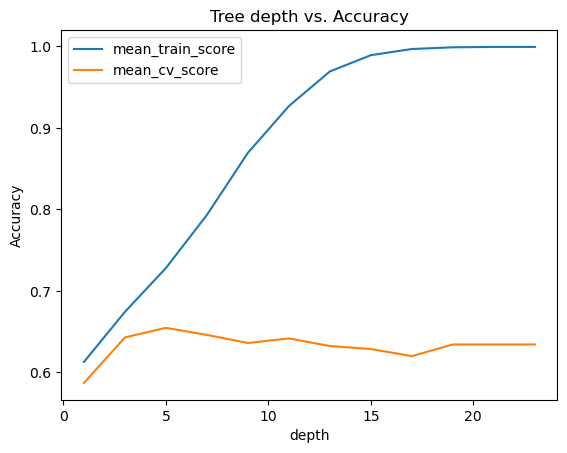

In [40]:
# max_depth_plot: the figure plotted for this exercise
max_depth_plot = None

# BEGIN SOLUTION
def dtree_train_cv(depth):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    return pd.Series([scores["train_score"].mean(), scores["test_score"].mean()])

results_df = pd.DataFrame({'depth': range(1, 25, 2)})
results_df[['mean_train_score', 'mean_cv_score']] = results_df['depth'].apply(dtree_train_cv)
max_depth_plot = results_df.plot(x='depth', title="Tree depth vs. Accuracy", ylabel="Accuracy");
# END SOLUTION

max_depth_plot;

In [41]:
assert X_train.shape == (1613, 7), "Shape is incorrect"
assert y_train.shape == (1613,), "Shape is incorrect"
assert X_test.shape == (404, 7), "Shape is incorrect"
assert y_test.shape == (404,), "Shape is incorrect"

assert (round(X_train.iloc[123]["loudness"], 2) == -10.10), "Are you using the correct X_train, y_train, X_test, y_test?"
assert (round(y_train.iloc[62], 2) == 0.00), "Are you using the correct X_train, y_train, X_test, y_test?"
assert (round(X_test.iloc[234]["valence"], 2) == 0.18), "Are you using the correct X_train, y_train, X_test, y_test?"
assert (round(y_test.iloc[399], 2) == 1.00), "Are you using the correct X_train, y_train, X_test, y_test?"

In [42]:
assert not max_depth_plot is None, "Are you storing the plot in a variable?"
assert (len(max_depth_plot.lines) == 2), "Please plot both the train accuracy and the cross-validation accuracy"

In [43]:
# Check if the expected max_depths are on the x-axis
assert "depth" in max_depth_plot.get_xlabel().lower(), "Please give x-axis a reasonable name"
assert "accuracy" in max_depth_plot.get_ylabel().lower(), "Please give y-axis a reasonable name"
assert (max_depth_plot.lines[0].get_xdata() == np.arange(1, 25, 2)).all(), "Please use the provided max_depth values"
assert len(max_depth_plot.lines[1].get_xdata()) == len(np.arange(1, 25, 2)), "Please use the provided max_depth values"

In [44]:
# Check if the curves are labeled with reasonable names
assert any(label in max_depth_plot.legend().get_texts()[0].get_text().lower() for label in ["train", "test", "cv"]), "Please label your curves with reasonable names"
assert any(label in max_depth_plot.legend().get_texts()[1].get_text().lower().lower() for label in ["train", "test", "cv"]), "Please label your curves with reasonable names"

In [45]:
# Get train and test data points
legend_texts = max_depth_plot.legend().get_texts()
if "train" in legend_texts[0].get_text():
    train_xydata = max_depth_plot.lines[0].get_xydata()
    valid_xydata = max_depth_plot.lines[1].get_xydata()
else:
    train_xydata = max_depth_plot.lines[1].get_xydata()
    valid_xydata = max_depth_plot.lines[0].get_xydata()

# Training scores should increase when max_depth increases
assert np.isclose(round(train_xydata[2][1], 3), 0.728, atol=0.02), "The training data points are incorrect"
assert (train_xydata[6][1] >= train_xydata[2][1]), "The training data points are incorrect"
assert (train_xydata[10][1] >= train_xydata[6][1]), "The training data points are incorrect"

# Test scores
assert np.isclose(round(valid_xydata[2][1], 3), 0.654, atol=0.02), "The training data points are incorrect"
assert np.isclose(round(valid_xydata[6][1], 3), 0.632, atol=0.02), "The training data points are incorrect"
assert np.isclose(round(valid_xydata[10][1], 3), 0.634, atol=0.02), "The training data points are incorrect"

<br><br>

### 4.3 Picking the best value for `max_depth`
rubric={autograde:2}

Before continuing, think about how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. 

<details><summary>Solution</summary>
    
In case of the training data, a higher value of `max_depth` parameter results in higher accuracy. When the accuracy is 1.0, it means that the model is able to classify all training examples perfectly. This happens because for higher `max_depth` values, the decision tree learns a specific rule for almost all examples in the training data. In case of the cross-validation scores, initially the accuracy increases a bit and then it goes back down since the model is no longer learning the general relationship between the input features and the target, but instead learning about noise in the training data.

</details>


**Your tasks:**
1. From your results, pick the "best" `max_depth`, the one which gives the maximum cross-validation score. Store it in a variable called `best_max_depth` as an integer. 

<div class="alert alert-warning">

Solution_4.3   
    
</div>

In [46]:
best_max_depth = None

# BEGIN SOLUTION
best_max_depth = results_df.loc[results_df['mean_cv_score'].argmax(), 'depth']
best_max_depth
# END SOLUTION

5

In [47]:
assert not best_max_depth is None, "Are you using the provided variable?"
assert sha1(str(best_max_depth).encode('utf-8')).hexdigest() == 'ac3478d69a3c81fa62e60f5c3696165a4e5e6ac4', "Are you picking the best_max_depth which gives the highest cross-validation score?"

<br><br>

### 4.4 Final assessment on the test split 
rubric={autograde:2}

Now that we have our finalized model, we are ready to evaluate it on the test set!

**Your tasks:**

1. Create a decision tree model `best_model` using the `best_max_depth` you chose in the previous exercise. 
2. Fit the `best_model` on the _entire training set_ (`X_train` and `y_train`). 
2. Compute the test score (on `X_test` and `y_test`) and store it in a variable called `test_score` below. 

<div class="alert alert-warning">

Solution_4.5
    
</div>

In [48]:
best_model = None
test_score = None

# BEGIN SOLUTION
best_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=123)
best_model.fit(X_train, y_train)
test_score = best_model.score(X_test, y_test)
# END SOLUTION

In [49]:
assert not best_model is None, "Are you creating a tree called best_spotify_tree?"
assert best_model.get_params()['random_state'] == 123, "Are you setting the random_state to 123?"
assert best_model.get_n_leaves() in range(25, 30), "Are you fitting best_spotify_tree?"
assert best_model.get_depth() == best_max_depth, "Are you fitting best_spotify_tree?"

In [50]:
assert (round(test_score, 3) == 0.661), "Your test score seems off. Are you training on the entire training data?"

<br><br>

### 4.5 Visualizing Spotify decision tree
rubric={autograde:3}

**Your tasks:**
1. Visualize `best_model` with the `display_tree` function from Exercise 1.5 with `counts=True`. Store the visualization in `spotify_tree_viz` variable below. 
2. Which feature did the model pick as the best feature? In other words, what feature did the model use for the first split? Store the name of the feature as a string in the variable called `best_feat` below. 

<div class="alert alert-warning">

Solution_4.5
    
</div>

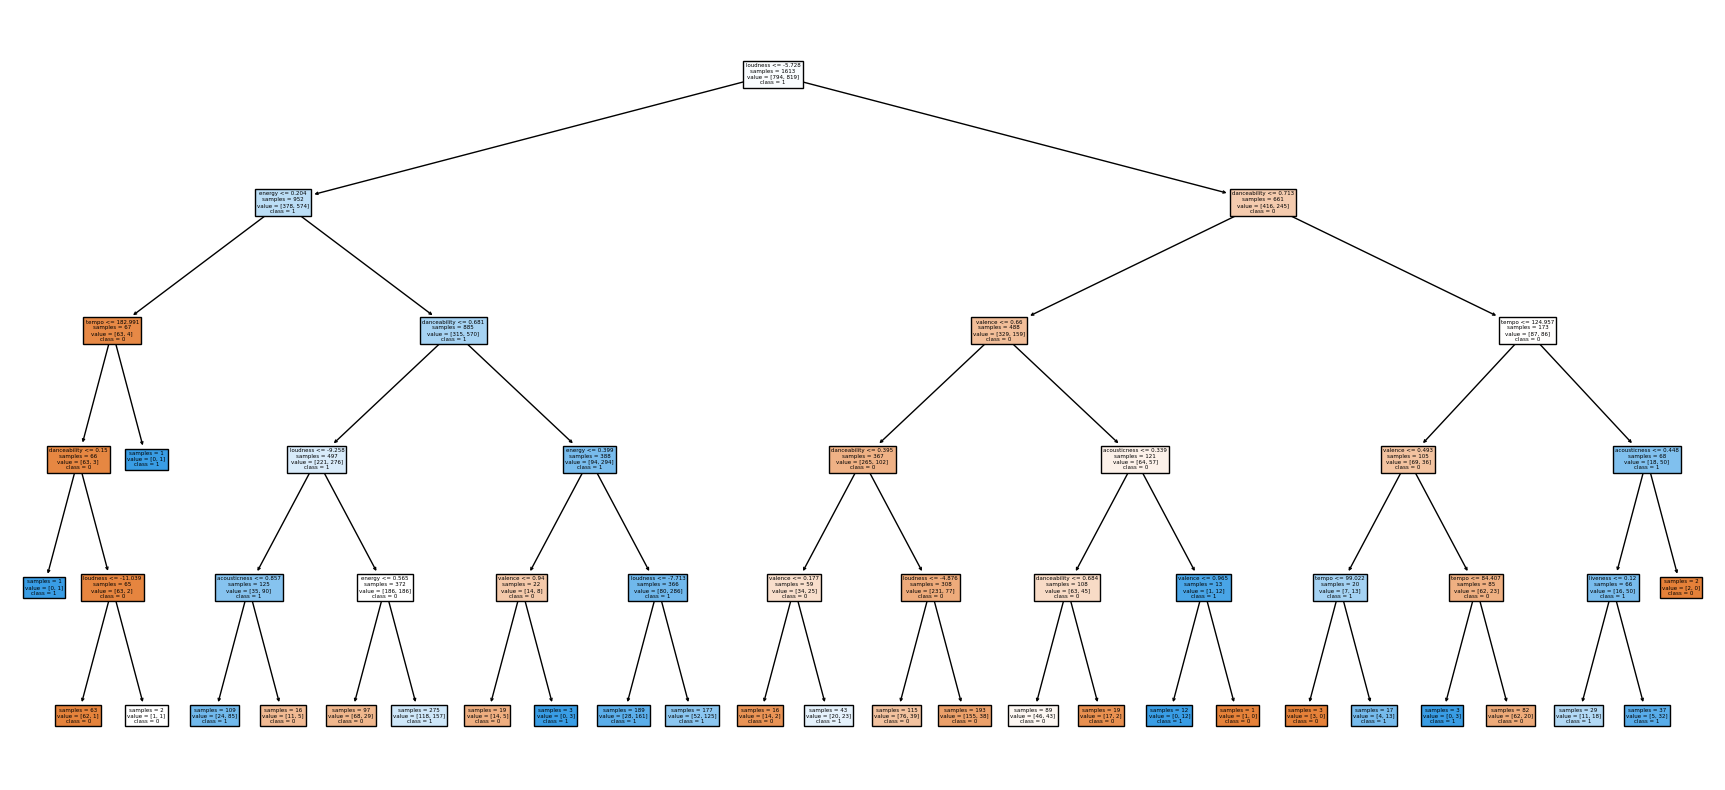

In [51]:
spotify_tree_viz = None
best_feat = None

# BEGIN SOLUTION
spotify_tree_viz = display_tree(best_model, figsize=(22, 10))
best_feat = "instrumentalness"
# END SOLUTION

spotify_tree_viz;

In [52]:
assert not best_feat is None, "Are you setting the best_feat variable?"
assert sha1(best_feat.encode('utf-8')).hexdigest() == '6cd560e4ccffc46287399c5f226bb2cc95e8c987', "The best_feat seems incorrect"

<br><br>

<div class="alert alert-warning">

Solution_4.6
    
</div>

### 4.6 Analysis
rubric={reasoning:6}

**Your tasks:**

Reflect on the following questions:

1. How do the test scores compare to the cross-validation scores? Briefly discuss. 
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?


<details><summary>Solutions</summary>
    
1. We see the test score is a bit higher compared to the cross-validation score. But I would not trust this result too much. Looking at the plot, we can see the cv score plot is quite "bumpy" and even if `max_depth=5` is a pretty good value, there is probably also some luck involved there.
2. If we are to pick `max_depth` simply based on the training data, it'll pick the lowest value for the parameter as it performs best on the training set. (See the table and plot in 5.1.) That said, that model would be overfit and it won't generalize well on the validation data. That's why we treat it as a hyperparameter and pick the best value based on the cross-validation accuracy. 
3. Whether the chosen `max_depth` generalizes to other users or not would depend upon how similar the new user is to this user. In other words, whether the training data for this user is representative of the new user or not. That said, the chosen `max_depth` of 5 would most like do better than if we had chosen a higher depth.  
    
</details>

### Congratulations on practice 1! Well done 👏👏! 

![](img/eva-well-done.png)